# Calculate `Asym` vs. `Emin` from `bhm_e`

Rewriting `calc_Asym_vs_emin_energies` for `bhm_e`.

Generate Asym_df for a specific dataset.

P. Schuster  
July 18, 2018  

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

import sys
import os
import os.path
import scipy.io as sio

import time
import numpy as np
np.set_printoptions(threshold=np.nan) # print entire matrices
import pandas as pd
from tqdm import *

In [2]:
sys.path.append('../scripts/')

In [3]:
import bicorr as bicorr
import bicorr_math as bicorr_math
import bicorr_plot as bicorr_plot
import bicorr_e as bicorr_e
import bicorr_sums as bicorr_sums

In [4]:
%load_ext autoreload
%autoreload 2

# Load data

In [5]:
det_df = bicorr.load_det_df()

In [6]:
chList, fcList, detList, num_dets, num_det_pairs = bicorr.build_ch_lists()
dict_pair_to_index, dict_index_to_pair, dict_pair_to_angle = bicorr.build_dict_det_pair(det_df)

In [7]:
singles_hist_e_n, e_bin_edges, dict_det_to_index, dict_index_to_det = bicorr_e.load_singles_hist_both(filepath = '../analysis/Cf072115_to_Cf072215b/datap/',plot_flag=True, save_flag=True)

<Figure size 288x216 with 0 Axes>

In [8]:
bhm_e, e_bin_edges, note = bicorr_e.load_bhm_e('../analysis/Cf072115_to_Cf072215b/datap')

In [9]:
bhp_e = np.zeros((len(det_df),len(e_bin_edges)-1,len(e_bin_edges)-1))
for index in det_df.index.values: # index is same as in `bhm`
    bhp_e[index,:,:] = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,pair_is=[index])[0]

In [10]:
emins = np.arange(0.5,5,.2)
emax = 12
print(emins)

angle_bin_edges = np.arange(8,190,10)
print(angle_bin_edges)

[0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9
 4.1 4.3 4.5 4.7 4.9]
[  8  18  28  38  48  58  68  78  88  98 108 118 128 138 148 158 168 178
 188]


# Functionalize

Generating data in angle bin 8 to 18
Generating data in angle bin 18 to 28
Generating data in angle bin 28 to 38
Generating data in angle bin 38 to 48
Generating data in angle bin 48 to 58
Generating data in angle bin 58 to 68
Generating data in angle bin 68 to 78
Generating data in angle bin 78 to 88
Generating data in angle bin 88 to 98
Generating data in angle bin 98 to 108
Generating data in angle bin 108 to 118
Generating data in angle bin 118 to 128
Generating data in angle bin 128 to 138
Generating data in angle bin 138 to 148
Generating data in angle bin 148 to 158
Generating data in angle bin 158 to 168
Generating data in angle bin 168 to 178
Generating data in angle bin 178 to 188
Generating data in angle bin 8 to 18
Generating data in angle bin 18 to 28
Generating data in angle bin 28 to 38
Generating data in angle bin 38 to 48
Generating data in angle bin 48 to 58
Generating data in angle bin 58 to 68
Generating data in angle bin 68 to 78
Generating data in angle bin 78 to 

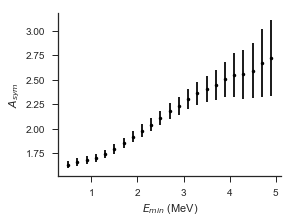

<Figure size 576x396 with 0 Axes>

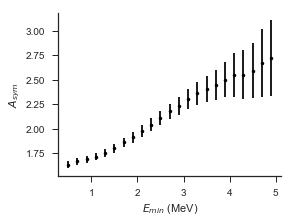

,emin,emax,emin_real,emax_real,Asym,Asym_err,Asym_min,Asym_min_err
0,0.5,12,12.0,0.500,1.630976,0.037310,1.633575,0.036622
1,0.7,12,12.0,0.675,1.660102,0.040031,1.667297,0.036416
2,0.9,12,12.0,0.875,1.678459,0.040657,1.689827,0.035507
3,1.1,12,12.0,1.075,1.701879,0.041523,1.713727,0.036140
4,1.3,12,12.0,1.275,1.740619,0.044086,1.751662,0.039785


<Figure size 576x396 with 0 Axes>

In [14]:
Asym_df = bicorr_sums.calc_Asym_vs_emin_energies(det_df, dict_index_to_det, singles_hist_e_n, e_bin_edges, bhp_e, e_bin_edges, emins, emax, angle_bin_edges, plot_flag=True, show_flag = True, save_flag=False)
Asym_df.head()